In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
tickers = [
    "ADANIENT.NS",
    "ADANIPORTS.NS",
    "APOLLOHOSP.NS",
    "ASIANPAINT.NS",
    "AXISBANK.NS",
    "BAJAJ-AUTO.NS",
    "BAJFINANCE.NS",
    "BAJAJFINSV.NS",
    "BPCL.NS",
    "BHARTIARTL.NS",
    "BRITANNIA.NS",
    "CIPLA.NS",
    "COALINDIA.NS",
    "DIVISLAB.NS",
    "DRREDDY.NS",
    "EICHERMOT.NS",
    "GRASIM.NS",
    "HCLTECH.NS",
    "HDFCBANK.NS",
    "HDFCLIFE.NS",
    "HEROMOTOCO.NS",
    "HINDALCO.NS",
    "HINDUNILVR.NS",
    "ICICIBANK.NS",
    "ITC.NS",
    "INDUSINDBK.NS",
    "INFY.NS",
    "JSWSTEEL.NS",
    "KOTAKBANK.NS",
    "LTIM.NS",
    "LT.NS",
    "M&M.NS",
    "MARUTI.NS",
    "NTPC.NS",
    "NESTLEIND.NS",
    "ONGC.NS",
    "POWERGRID.NS",
    "RELIANCE.NS",
    "SBILIFE.NS",
    "SBIN.NS",
    "SUNPHARMA.NS",
    "TCS.NS",
    "TATACONSUM.NS",
    "TATAMOTORS.NS",
    "TATASTEEL.NS",
    "TECHM.NS",
    "TITAN.NS",
    "UPL.NS",
    "ULTRACEMCO.NS",
    "WIPRO.NS"
]



In [13]:
dataframe = []
for i in range(50):
    stock_data = yf.download(tickers[i],'2022-04-01','2023-04-01')
    dataframe.append(stock_data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [14]:
close = []
for i in range(50):
    close.append(dataframe[i]['Close'])

In [15]:
daily_returns = []
for i in range(50):
    daily_returns.append(dataframe[i]['Close'].pct_change().dropna())

In [16]:

corr_data = pd.DataFrame({"stock1":[],
                          "stock2":[],
                          "correlation":[]})
for i in range(50):
    for j in range(49-i):
        correlation = np.corrcoef(daily_returns[i], daily_returns[i+j+1])[0, 1]
        df2 = {'stock1': i, 'stock2': i+j+1 , 'correlation':correlation}
        corr_data = corr_data.append(df2, ignore_index = True)


C:\Users\ashut\AppData\Local\Temp\ipykernel_3756\2092098159.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_data = corr_data.append(df2, ignore_index = True)
C:\Users\ashut\AppData\Local\Temp\ipykernel_3756\2092098159.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_data = corr_data.append(df2, ignore_index = True)
C:\Users\ashut\AppData\Local\Temp\ipykernel_3756\2092098159.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_data = corr_data.append(df2, ignore_index = True)
C:\Users\ashut\AppData\Local\Temp\ipykernel_3756\2092098159.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_data = corr_data.append(df

In [17]:
potential_stocks = pd.DataFrame({"stock1":[],
                                 "stock2":[],
                                 "correlation":[]})
for i in range(1225):
    if (corr_data['correlation'][i]>0.75):
        potential_stocks = potential_stocks.append(corr_data.loc[i], ignore_index=True)
potential_stocks


C:\Users\ashut\AppData\Local\Temp\ipykernel_3756\1050105818.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  potential_stocks = potential_stocks.append(corr_data.loc[i], ignore_index=True)


,stock1,stock2,correlation
0,0.0,1.0,0.757093
1,6.0,7.0,0.821877
2,17.0,26.0,0.766700
3,21.0,44.0,0.761929
4,26.0,41.0,0.790060
5,26.0,49.0,0.752171
6,27.0,44.0,0.785988


In [18]:
for i in range(len(potential_stocks)):
    potential_stocks['stock1'][i] = tickers[int(potential_stocks['stock1'][i])]
    potential_stocks['stock2'][i] = tickers[int(potential_stocks['stock2'][i])]
potential_stocks

C:\Users\ashut\AppData\Local\Temp\ipykernel_3756\2568109147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_stocks['stock2'][i] = tickers[int(potential_stocks['stock2'][i])]


,stock1,stock2,correlation
0,ADANIENT.NS,ADANIPORTS.NS,0.757093
1,BAJFINANCE.NS,BAJAJFINSV.NS,0.821877
2,HCLTECH.NS,INFY.NS,0.766700
3,HINDALCO.NS,TATASTEEL.NS,0.761929
4,INFY.NS,TCS.NS,0.790060
5,INFY.NS,WIPRO.NS,0.752171
6,JSWSTEEL.NS,TATASTEEL.NS,0.785988


## Pair trading with JSW STEEL and TATA STEEL

In [42]:
correlation_final = potential_stocks['correlation'][6]
correlation_final

0.7859877005747072

In [30]:
jsw = yf.download('JSWSTEEL.NS','2022-04-01','2023-04-01')
tata = yf.download('TATASTEEL.NS','2022-04-01','2023-04-01')
jsw_close = jsw['Close']
tata_close = tata['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


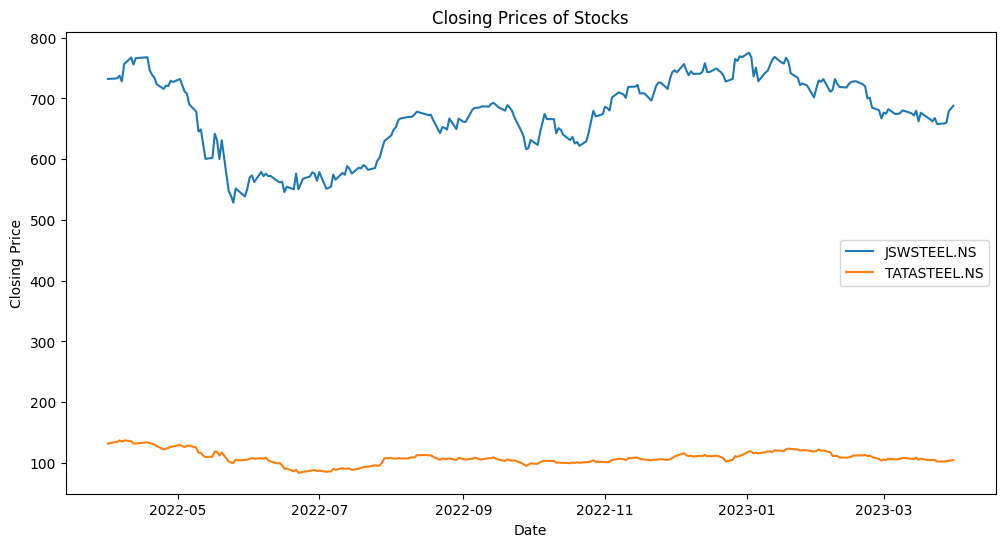

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(jsw_close.index, jsw_close, label='JSWSTEEL.NS')
ax.plot(tata_close.index, tata_close, label='TATASTEEL.NS')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.title('Closing Prices of Stocks')
plt.show()

In [44]:
df = pd.DataFrame({'stock_1': jsw_close, 'stock_2': tata_close}, index=jsw_close.index)
df

,stock_1,stock_2
Date,,
2022-04-01,732.200012,131.710007
2022-04-04,732.700012,134.190002
2022-04-05,733.450012,134.490005
2022-04-06,737.400024,137.074997
2022-04-07,728.049988,134.949997
...,...,...
2023-03-24,657.799988,102.099998
2023-03-27,658.849976,102.300003
2023-03-28,660.000000,102.500000


In [36]:
price_ratio = jsw_close / tata_close
price_ratio_mean = np.mean(price_ratio)
price_ratio_std = np.std(price_ratio)
z_score = (price_ratio - price_ratio_mean) / price_ratio_std

In [37]:
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
adf = adfuller(price_ratio)
print('ADF Test Statistic: %f' % adf[0])
print('10%% Critical Value: %f' % adf[4]['10%'])
print('p-value: %f' % adf[1])

ADF Test Statistic: -2.209294
10% Critical Value: -2.573044
p-value: 0.202889


p-value is fairly low so the two stocks are somewhat cointegrated

In [45]:
df['price_ratio']=(df.stock_1)/df.stock_2
df

,stock_1,stock_2,price_ratio
Date,,,
2022-04-01,732.200012,131.710007,5.559183
2022-04-04,732.700012,134.190002,5.460168
2022-04-05,733.450012,134.490005,5.453565
2022-04-06,737.400024,137.074997,5.379537
2022-04-07,728.049988,134.949997,5.394961
...,...,...,...
2023-03-24,657.799988,102.099998,6.442703
2023-03-27,658.849976,102.300003,6.440371
2023-03-28,660.000000,102.500000,6.439024


Text(0, 0.5, 'price ratio')

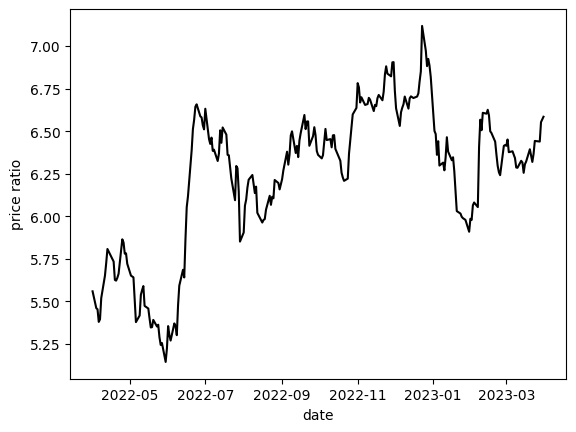

In [86]:
plt.plot(df.index,df.price_ratio,color='black')
plt.xlabel('date')
plt.ylabel('price ratio')

In [47]:
def calculate_rsi(data, window=14):
    price_change = data.diff(1)

    up_prices = price_change.where(price_change > 0, 0)
    down_prices = price_change.where(price_change < 0, 0)

    avg_gain = up_prices.rolling(window).mean()
    avg_loss = down_prices.abs().rolling(window).mean()

    rsi = 100 - (100 / (1 + (avg_gain/avg_loss)))
    return rsi

In [48]:
df['rsi_stock_1']=calculate_rsi(df.stock_1)
df['rsi_stock_2']=calculate_rsi(df.stock_2)
df

,stock_1,stock_2,price_ratio,rsi_stock_1,rsi_stock_2
Date,,,,,
2022-04-01,732.200012,131.710007,5.559183,NaN,NaN
2022-04-04,732.700012,134.190002,5.460168,NaN,NaN
2022-04-05,733.450012,134.490005,5.453565,NaN,NaN
2022-04-06,737.400024,137.074997,5.379537,NaN,NaN
2022-04-07,728.049988,134.949997,5.394961,NaN,NaN
...,...,...,...,...,...
2023-03-24,657.799988,102.099998,6.442703,36.493947,37.239572
2023-03-27,658.849976,102.300003,6.440371,40.800471,40.720223
2023-03-28,660.000000,102.500000,6.439024,40.800471,38.505743


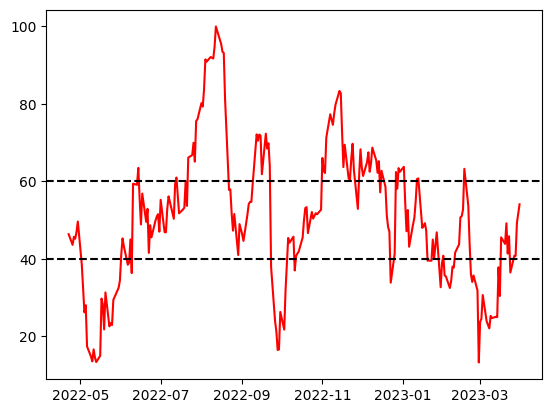

In [85]:
plt.plot(df.index,df.rsi_stock_1,color='red')
plt.axhline(40,linestyle='--',color='black')
plt.axhline(60,linestyle='--',color='black')

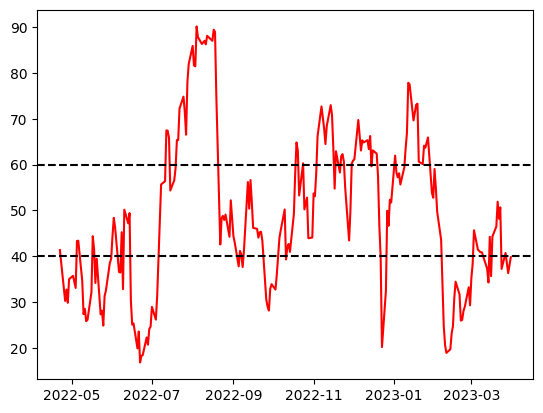

In [83]:
plt.plot(df.index,df.rsi_stock_2,color='red')
plt.axhline(40,linestyle='--',color='black')
plt.axhline(60,linestyle='--',color='black')

In [57]:
pd.set_option('display.min_rows', None)

In [58]:
df['rsi_ratio']=df.rsi_stock_1/df.rsi_stock_2
df

,stock_1,stock_2,price_ratio,rsi_stock_1,rsi_stock_2,rsi_ratio
Date,,,,,,
2022-04-01,732.200012,131.710007,5.559183,NaN,NaN,NaN
2022-04-04,732.700012,134.190002,5.460168,NaN,NaN,NaN
2022-04-05,733.450012,134.490005,5.453565,NaN,NaN,NaN
2022-04-06,737.400024,137.074997,5.379537,NaN,NaN,NaN
2022-04-07,728.049988,134.949997,5.394961,NaN,NaN,NaN
2022-04-08,756.599976,137.074997,5.519606,NaN,NaN,NaN
2022-04-11,767.400024,135.789993,5.651374,NaN,NaN,NaN
2022-04-12,755.900024,132.024994,5.725431,NaN,NaN,NaN
2022-04-13,766.349976,131.949997,5.807882,NaN,NaN,NaN


In [77]:
high_threshold = 1.3
low_threshold = 0.7
rsi_ratio=df.rsi_ratio

temp=0

signals = []
for i in range(len(rsi_ratio)):
    if rsi_ratio[i] > high_threshold and temp!=-1:
        signals.append(-1)  # sell stock_1, buy stock_2
        temp=-1
    elif rsi_ratio[i] < low_threshold and temp!=1:
        signals.append(1)   # buy stock_1, sell stock_2
        temp=1
    else:
        signals.append(0)   # No trade

print(signals)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]


In [78]:
investment=100000
number_of_stocks_1=0
number_of_stocks_2=0
in_hand=investment
returns=[]

for i in range(len(signals)):
    if signals[i]==1:
        in_hand+=number_of_stocks_2*tata_close[i]
        number_of_stocks_2=0
        temp=in_hand//jsw_close[i]
        in_hand-=temp*jsw_close[i]
        number_of_stocks_1+=temp

    if signals[i]==-1:
        in_hand+=number_of_stocks_1*jsw_close[i]
        number_of_stocks_1=0
        temp=in_hand//tata_close[i]
        in_hand-=temp*tata_close[i]
        number_of_stocks_2+=temp

    returns.append(in_hand+jsw_close[i]*number_of_stocks_1+tata_close[i]*number_of_stocks_2)

In [79]:
final_returns=returns[-1]
print("The return on investing 100000 rupees is:",final_returns)

percentage_returns=format((((final_returns)-(investment))/investment)*(100),".2f")
print("The percentage return in case of combined strategy is:",percentage_returns,"%")

The return on investing 100000 rupees is: 106197.13748168945
The percentage return in case of combined strategy is: 6.20 %


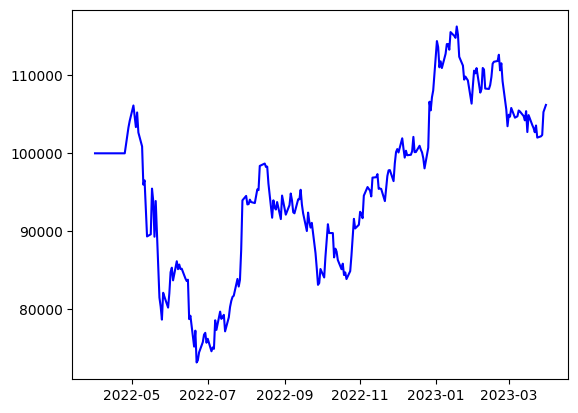

In [82]:
plt.plot(df.index,returns,color='blue',label='Returns')

In [81]:
adjusted_returns = [x - 0.05 for x in returns]
sharpe_ratio = np.mean(adjusted_returns)/np.std(returns)
sharpe_ratio

8.980668484078928